* Deletions
* HG002 Only
* Technology: 10X

* The following classifier will train on and predict the following labels:
    - GTcons
    
* All -1 values have been removed from the train and test set

In [45]:
"""
Imports
"""
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [46]:
# Import Training Data
# SVanalyzer generated training data
df_train = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/train/tech_sep/DEL/no_minus_one/TenX_HG002_no-1_DEL.csv')
df_train_2 = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/train/tech_sep/DEL/no_minus_one/TenX_HG002_no-1_DEL.csv')
df_train.rename(columns={'size': 'Size'}, inplace=True)
df_train.head(1)

,chrom,id,sample,start,end,type,SVtype,Size,refN_cnt,refN_pct,...,TenX.HP2_amb_reason_orientation_orientation,TenX.HP2_amb_reason_same_scores,TenX.HP2_ref_alnScore_mean,TenX.HP2_ref_alnScore_std,TenX.HP2_ref_count,TenX.HP2_ref_insertSize_mean,TenX.HP2_ref_insertSize_std,TenX.HP2_ref_reason_alignmentScore,TenX.HP2_ref_reason_insertSizeScore,TenX.HP2_ref_reason_orientation
0,1,39,HG002,109690878,109690918,Insertion,Deletion,-39,0,0,...,3.0,5.0,527.0,0.0,1.0,334.0,0.0,1.0,NaN,0.0


In [47]:
# Import Test Data
# SVanalyzer generated training data
df_test = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/test/tech_sep/DEL/no_minus_one/TenX_HG002_no-1_DEL.csv')
df_test_2 = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/test/tech_sep/DEL/no_minus_one/TenX_HG002_no-1_DEL.csv')
df_test.rename(columns={'size': 'Size'}, inplace=True)
df_test.head(1)

,chrom,id,sample,start,end,type,SVtype,Size,refN_cnt,refN_pct,...,TenX.HP2_amb_reason_orientation_orientation,TenX.HP2_amb_reason_same_scores,TenX.HP2_ref_alnScore_mean,TenX.HP2_ref_alnScore_std,TenX.HP2_ref_count,TenX.HP2_ref_insertSize_mean,TenX.HP2_ref_insertSize_std,TenX.HP2_ref_reason_alignmentScore,TenX.HP2_ref_reason_insertSizeScore,TenX.HP2_ref_reason_orientation
0,4,1,HG002,95498964,95499280,Deletion,Deletion,-316,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(c) - set(d)

{'Label', 'TenX.HP1_amb_reason_alignmentScore_insertSizeScore'}

In [49]:
### Drop columns that are not shared by both dataframes
df_train.drop(['TenX.HP1_amb_reason_alignmentScore_insertSizeScore'], axis=1, inplace = True)
df_train.drop(['Label'], axis=1, inplace = True)
df_train.drop(['GTconflict'], axis=1, inplace = True)
df_train.drop(['GTsupp'], axis=1, inplace = True)
df_train.drop(['sample'], axis=1, inplace = True)
df_train.drop(['SVtype'], axis=1, inplace = True)
df_train.drop(['type'], axis=1, inplace = True)
df_train.drop(['id'], axis=1, inplace = True)

In [50]:
df_train.head(1)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,TenX.HP2_amb_reason_orientation_orientation,TenX.HP2_amb_reason_same_scores,TenX.HP2_ref_alnScore_mean,TenX.HP2_ref_alnScore_std,TenX.HP2_ref_count,TenX.HP2_ref_insertSize_mean,TenX.HP2_ref_insertSize_std,TenX.HP2_ref_reason_alignmentScore,TenX.HP2_ref_reason_insertSizeScore,TenX.HP2_ref_reason_orientation
0,1,109690878,109690918,-39,0,0,0,0.0,1,0.4,...,3.0,5.0,527.0,0.0,1.0,334.0,0.0,1.0,NaN,0.0


In [51]:
df_train['chrom'].replace('X', 23, inplace=True)
df_train['chrom'].replace('Y', 24, inplace=True)
df_test['chrom'].replace('X', 23, inplace=True)
df_test['chrom'].replace('Y', 24, inplace=True)

In [52]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(d) - set(c)

{'GTconflict', 'GTsupp', 'SVtype', 'id', 'sample', 'type'}

In [53]:
### Drop columns that are not shared by both dataframes
df_test.drop(['GTcons'], axis=1, inplace = True)
df_test.drop(['GTconflict'], axis=1, inplace = True)
df_test.drop(['GTsupp'], axis=1, inplace = True)
df_test.drop(['sample'], axis=1, inplace = True)
df_test.drop(['SVtype'], axis=1, inplace = True)
df_test.drop(['type'], axis=1, inplace = True)
df_test.drop(['id'], axis=1, inplace = True)

***
Impute missing values using KNN
***

In [54]:
# Store training data in a new variable which will be converted to a matrix
X = df_train
X.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,TenX.HP2_amb_reason_orientation_orientation,TenX.HP2_amb_reason_same_scores,TenX.HP2_ref_alnScore_mean,TenX.HP2_ref_alnScore_std,TenX.HP2_ref_count,TenX.HP2_ref_insertSize_mean,TenX.HP2_ref_insertSize_std,TenX.HP2_ref_reason_alignmentScore,TenX.HP2_ref_reason_insertSizeScore,TenX.HP2_ref_reason_orientation
0,1,109690878,109690918,-39,0,0,0,0.000000,1,0.4,...,3.0,5.0,527.00000,0.000000,1.0,334.0000,0.000000,1.0,NaN,0.0
1,1,1869280,1869312,-31,0,0,0,0.000000,0,0.0,...,7.0,5.0,539.59375,18.205184,32.0,353.8125,88.086051,32.0,NaN,0.0
2,1,2891239,2891284,-44,0,0,1,0.666667,1,1.0,...,1.0,1.0,0.00000,0.000000,0.0,0.0000,0.000000,0.0,NaN,0.0


In [55]:
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)

Imputing row 1/1972 with 8 missing, elapsed time: 1.806
Imputing row 101/1972 with 8 missing, elapsed time: 1.836
Imputing row 201/1972 with 8 missing, elapsed time: 1.868
Imputing row 301/1972 with 8 missing, elapsed time: 1.895
Imputing row 401/1972 with 8 missing, elapsed time: 1.922
Imputing row 501/1972 with 8 missing, elapsed time: 1.951
Imputing row 601/1972 with 8 missing, elapsed time: 1.998
Imputing row 701/1972 with 8 missing, elapsed time: 2.030
Imputing row 801/1972 with 8 missing, elapsed time: 2.066
Imputing row 901/1972 with 8 missing, elapsed time: 2.097
Imputing row 1001/1972 with 8 missing, elapsed time: 2.130
Imputing row 1101/1972 with 8 missing, elapsed time: 2.160
Imputing row 1201/1972 with 65 missing, elapsed time: 2.223
Imputing row 1301/1972 with 0 missing, elapsed time: 2.260
Imputing row 1401/1972 with 0 missing, elapsed time: 2.265
Imputing row 1501/1972 with 0 missing, elapsed time: 2.270
Imputing row 1601/1972 with 0 missing, elapsed time: 2.274
Imputing

In [56]:
# Store header values in a list, will be used later to re-label the matrix post KNN imputation
dftrain_header = list(df_train.columns.values)
X.columns = dftrain_header
X.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,TenX.HP2_amb_reason_orientation_orientation,TenX.HP2_amb_reason_same_scores,TenX.HP2_ref_alnScore_mean,TenX.HP2_ref_alnScore_std,TenX.HP2_ref_count,TenX.HP2_ref_insertSize_mean,TenX.HP2_ref_insertSize_std,TenX.HP2_ref_reason_alignmentScore,TenX.HP2_ref_reason_insertSizeScore,TenX.HP2_ref_reason_orientation
0,1.0,109690878.0,109690918.0,-39.0,0.0,0.0,0.0,0.000000,1.0,0.4,...,3.0,5.0,527.00000,0.000000,1.0,334.0000,0.000000,1.0,0.0,0.0
1,1.0,1869280.0,1869312.0,-31.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,7.0,5.0,539.59375,18.205184,32.0,353.8125,88.086051,32.0,0.0,0.0
2,1.0,2891239.0,2891284.0,-44.0,0.0,0.0,1.0,0.666667,1.0,1.0,...,1.0,1.0,0.00000,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0


In [57]:
# Store Labels in a new 'Y' DataFrame
Y = pd.DataFrame()
Y['GTcons'] = X['GTcons']

In [58]:
#Count the number of labels
pd.value_counts(Y['GTcons'].values, sort=False)

1.0     642
2.0     154
0.0    1176
dtype: int64

In [59]:
# Note: originally selected 1000 of each label --> find out why some are lost

In [60]:
# Remove labels from feature set
X.drop(['GTcons'],axis=1, inplace = True)

In [61]:
# Order features
X4 = X.reindex_axis(sorted(X.columns), axis=1)

***
Machine Learning
***

** Train RF Classifier **

In [62]:
# Train Test Split
# Train on 70% of the data and test on 30%
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)

In [63]:
# %%timeit
# Train Random Forest Classifier
model = RandomForestClassifier() 
model.fit(X_train, y_train)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [64]:
# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 35 (0.058041)
2. feature 38 (0.053358)
3. feature 6 (0.052132)
4. feature 7 (0.043673)
5. feature 63 (0.043074)
6. feature 60 (0.036923)
7. feature 37 (0.036795)
8. feature 34 (0.036324)
9. feature 4 (0.034552)
10. feature 3 (0.034269)
11. feature 36 (0.030310)
12. feature 31 (0.027666)
13. feature 1 (0.025858)
14. feature 27 (0.024312)
15. feature 30 (0.021783)
16. feature 61 (0.021507)
17. feature 53 (0.019620)
18. feature 39 (0.018236)
19. feature 29 (0.017299)
20. feature 59 (0.016743)
21. feature 28 (0.015694)
22. feature 58 (0.015549)
23. feature 26 (0.015511)
24. feature 62 (0.015281)
25. feature 42 (0.014712)
26. feature 22 (0.014397)
27. feature 46 (0.013899)
28. feature 10 (0.013367)
29. feature 12 (0.013058)
30. feature 49 (0.012319)
31. feature 17 (0.011769)
32. feature 11 (0.011685)
33. feature 44 (0.011600)
34. feature 0 (0.011049)
35. feature 13 (0.010713)
36. feature 66 (0.010654)
37. feature 14 (0.010450)
38. feature 21 (0.010273)
39. featur

[Another Resource](https://stackoverflow.com/questions/37877542/how-to-label-the-feature-importance-with-forests-of-trees)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for INPLACE sorting



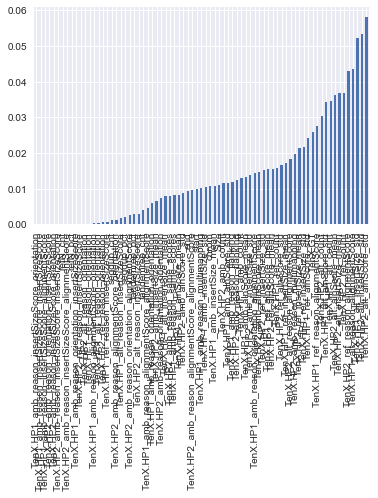

In [65]:
%matplotlib inline
feature_importances = pd.Series(model.feature_importances_, index=X_test.columns)
feature_importances.sort()
feature_importances.plot.bar()

In [66]:
#TODO: Try training the model with the most important features and note difference in overal model prediction score

In [67]:
#NOTE: Training Set - Show number of Hom Ref, Hom Var, Het Var datapoints the model was trained on
ytrain = pd.DataFrame()
ytrain['ytrain'] = y_train
pd.value_counts(ytrain['ytrain'].values, sort=False)

1.0    316
2.0     91
0.0    548
dtype: int64

In [68]:
model.predict(X_test)

array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        1.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  1.,  2

In [69]:
pred = model.predict(X_test)

In [70]:
print('Precision score of the training subset: {:.3f}'.format(precision_score(pred, y_test, average='micro'))) 

Precision score of the training subset: 0.821


In [71]:
# Add original labels and predicted labels back to the original dataframe
df_Xtest = pd.DataFrame(X_test)
df_Xtest.head()

,Size,TenX.GT,TenX.HP1_alt_alnScore_mean,TenX.HP1_alt_alnScore_std,TenX.HP1_alt_count,TenX.HP1_alt_insertSize_mean,TenX.HP1_alt_insertSize_std,TenX.HP1_alt_reason_alignmentScore,TenX.HP1_alt_reason_insertSizeScore,TenX.HP1_alt_reason_orientation,...,TenX.HP2_ref_reason_orientation,chrom,end,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
18,-64.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,1.0,94943297.0,0.0,0.0,0.0,0.0,94943232.0,0.0,0.000000
294,-46.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,3.0,2923285.0,0.0,0.0,0.0,0.0,2923238.0,1.0,1.000000
1174,-26.0,0.0,541.000000,0.000000,1.0,272.000000,0.000000,1.0,0.0,0.0,...,0.0,9.0,133016003.0,0.0,0.0,0.0,0.0,133015976.0,1.0,0.333333
1702,-32.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,4.0,33863270.0,0.0,0.0,1.0,1.0,33863238.0,1.0,1.000000
512,-20.0,-1.0,544.692308,5.297091,13.0,327.076923,56.405757,13.0,0.0,0.0,...,0.0,9.0,80230639.0,0.0,0.0,0.0,0.0,80230618.0,1.0,1.000000


In [72]:
labels = pd.DataFrame(y_test)

In [73]:
df_Xtest['predicted_label'] = pred
df_Xtest['GTcons'] = df_train['GTcons']
df_Xtest['chrom'] = df_train['chrom']
df_Xtest['start'] = df_train['start']
df_Xtest['end'] = df_train['end']
# df_Xtest['Y_test'] = labels

In [74]:
pd.value_counts(df_Xtest['GTcons'].values, sort=False)

0    343
1    205
2     44
dtype: int64

In [75]:
pd.value_counts(df_Xtest['predicted_label'].values, sort=False)

1.0    221
0.0    355
2.0     16
dtype: int64

In [76]:
from sklearn.metrics import confusion_matrix
ytest = df_Xtest['GTcons']
predict = df_Xtest['predicted_label']
print(confusion_matrix(ytest, predict))

[[316  24   3]
 [ 28 167  10]
 [ 11  30   3]]


In [77]:
pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,2.0,All
True,,,,
0,316,24,3,343
1,28,167,10,205
2,11,30,3,44
All,355,221,16,592


In [78]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

             precision    recall  f1-score   support

          0       0.89      0.92      0.91       343
          1       0.76      0.81      0.78       205
          2       0.19      0.07      0.10        44

avg / total       0.79      0.82      0.80       592



***
Predict
***

** Load Data **

In [79]:
X2 = df_test

** Impute missing values using KNN **

In [80]:
#Convert dataframe to matrix
X2=X2.as_matrix()

#Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/3504 with 2 missing, elapsed time: 5.906
Imputing row 101/3504 with 4 missing, elapsed time: 5.941
Imputing row 201/3504 with 4 missing, elapsed time: 5.963
Imputing row 301/3504 with 4 missing, elapsed time: 5.999
Imputing row 401/3504 with 3 missing, elapsed time: 6.027
Imputing row 501/3504 with 4 missing, elapsed time: 6.050
Imputing row 601/3504 with 2 missing, elapsed time: 6.081
Imputing row 701/3504 with 4 missing, elapsed time: 6.112
Imputing row 801/3504 with 65 missing, elapsed time: 6.133
Imputing row 901/3504 with 2 missing, elapsed time: 6.157
Imputing row 1001/3504 with 3 missing, elapsed time: 6.179
Imputing row 1101/3504 with 7 missing, elapsed time: 6.210
Imputing row 1201/3504 with 3 missing, elapsed time: 6.238
Imputing row 1301/3504 with 4 missing, elapsed time: 6.262
Imputing row 1401/3504 with 3 missing, elapsed time: 6.297
Imputing row 1501/3504 with 4 missing, elapsed time: 6.330
Imputing row 1601/3504 with 7 missing, elapsed time: 6.353
Imputing

In [81]:
dftest_header = list(df_test.columns.values)
X2.columns = dftest_header
X2.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,TenX.HP2_amb_reason_orientation_orientation,TenX.HP2_amb_reason_same_scores,TenX.HP2_ref_alnScore_mean,TenX.HP2_ref_alnScore_std,TenX.HP2_ref_count,TenX.HP2_ref_insertSize_mean,TenX.HP2_ref_insertSize_std,TenX.HP2_ref_reason_alignmentScore,TenX.HP2_ref_reason_insertSizeScore,TenX.HP2_ref_reason_orientation
0,4.0,95498964.0,95499280.0,-316.0,0.0,0.0,0.0,0.0,1.0,0.117089,...,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,19.0,14399929.0,14399954.0,-24.0,0.0,0.0,1.0,1.0,1.0,1.000000,...,0.0,3.0,541.818182,19.530015,11.0,300.0,66.530922,11.0,0.0,0.0
2,8.0,76766532.0,76766569.0,-36.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,4.0,9.0,548.000000,0.000000,1.0,181.0,0.000000,1.0,0.0,0.0


In [82]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,TenX.HP2_amb_reason_orientation_orientation,TenX.HP2_amb_reason_same_scores,TenX.HP2_ref_alnScore_mean,TenX.HP2_ref_alnScore_std,TenX.HP2_ref_count,TenX.HP2_ref_insertSize_mean,TenX.HP2_ref_insertSize_std,TenX.HP2_ref_reason_alignmentScore,TenX.HP2_ref_reason_insertSizeScore,TenX.HP2_ref_reason_orientation
0,4.0,95498964.0,95499280.0,-316.0,0.0,0.0,0.0,0.0,1.0,0.117089,...,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,19.0,14399929.0,14399954.0,-24.0,0.0,0.0,1.0,1.0,1.0,1.000000,...,0.0,3.0,541.818182,19.530015,11.0,300.0,66.530922,11.0,0.0,0.0
2,8.0,76766532.0,76766569.0,-36.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,4.0,9.0,548.000000,0.000000,1.0,181.0,0.000000,1.0,0.0,0.0


In [83]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

In [85]:
model.predict(X5)

array([ 1.,  0.,  1., ...,  1.,  0.,  0.])

In [86]:
pred = model.predict(X5)

In [87]:
X5['predicted_label'] = pred
X5['chrom'] = df_test_2['chrom']
X5['start'] = df_test_2['start']
X5['end'] = df_test_2['end']
X5['Size'] = df_test_2['Size']
X5['GTcons'] = df_test_2['GTcons']
X5['GTsupp'] = df_test_2['GTsupp']

In [88]:
X5.head(3)

,Size,TenX.GT,TenX.HP1_alt_alnScore_mean,TenX.HP1_alt_alnScore_std,TenX.HP1_alt_count,TenX.HP1_alt_insertSize_mean,TenX.HP1_alt_insertSize_std,TenX.HP1_alt_reason_alignmentScore,TenX.HP1_alt_reason_insertSizeScore,TenX.HP1_alt_reason_orientation,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
0,-316,2.0,541.684211,14.404139,19.0,351.105263,136.86178,14.0,5.0,0.0,...,0.0,0.0,0.0,0.0,95498964,1.0,0.117089,1.0,2,1
1,-24,-1.0,545.000000,0.000000,1.0,252.000000,0.00000,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,14399929,1.0,1.000000,0.0,1,1
2,-36,1.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,76766532,0.0,0.000000,1.0,1,2


***
Label Analysis
***

In [89]:
df_new = pd.DataFrame()
df_new['true'] = df_test_2['GTcons'].astype(float)
df_new['predicted'] = pred
df_new['predicted'] = df_new['predicted'].astype(float)

In [90]:
pd.value_counts(df_new['true'].values, sort=False)

2.0     671
1.0    1912
0.0     921
dtype: int64

In [91]:
pd.value_counts(df_new['predicted'].values, sort=False)

1.0    2213
0.0    1108
2.0     183
dtype: int64

In [92]:
# Calculate Precision Score
true = df_new['true']
predicted = df_new['predicted']
print('Precision score of the test subset: {:.3f}'.format(precision_score(true, predicted, average='micro'))) 

Precision score of the test subset: 0.734


In [93]:
pd.crosstab(true, predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,2.0,All
True,,,,
0.0,858,60,3,921
1.0,206,1620,86,1912
2.0,44,533,94,671
All,1108,2213,183,3504


#### Crowdsourced (Crowdvariant) Results
![Figure1](https://raw.githubusercontent.com/lesleymaraina/NIST/master/Notebooks/SVanalyzer_ML/DEL/images/10X_CrowdVar.png)

** Exact Match **

In [94]:
em = X5['predicted_label'] == 1.0
exact_match = X5[em]

In [95]:
exact_match.head(1)

,Size,TenX.GT,TenX.HP1_alt_alnScore_mean,TenX.HP1_alt_alnScore_std,TenX.HP1_alt_count,TenX.HP1_alt_insertSize_mean,TenX.HP1_alt_insertSize_std,TenX.HP1_alt_reason_alignmentScore,TenX.HP1_alt_reason_insertSizeScore,TenX.HP1_alt_reason_orientation,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
0,-316,2.0,541.684211,14.404139,19.0,351.105263,136.86178,14.0,5.0,0.0,...,0.0,0.0,0.0,0.0,95498964,1.0,0.117089,1.0,2,1


In [96]:
output_notebook()
p = figure()
p = Histogram(exact_match, values='GTcons', title='Exact_Match_HG002: Consensust GT', color='LightSlateGray', bins=15, plot_height=250, xlabel="GTcons", ylabel="Frequency")
show(p)

Loading BokehJS ...

** Homozygous Reference **

In [97]:
hr = X5['predicted_label'] == 0.0
hom_ref = X5[hr]
hom_ref.head(1)

,Size,TenX.GT,TenX.HP1_alt_alnScore_mean,TenX.HP1_alt_alnScore_std,TenX.HP1_alt_count,TenX.HP1_alt_insertSize_mean,TenX.HP1_alt_insertSize_std,TenX.HP1_alt_reason_alignmentScore,TenX.HP1_alt_reason_insertSizeScore,TenX.HP1_alt_reason_orientation,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
1,-24,-1.0,545.0,0.0,1.0,252.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,14399929,1.0,1.0,0.0,1,1


In [98]:
output_notebook()
p = figure()
p = Histogram(hom_ref, values='GTcons', title='Homozygous_Reference_HG002: Consensust GT', color='LightSlateGray', bins=15, plot_height=250, xlabel="GTcons", ylabel="Frequency")
show(p)

Loading BokehJS ...

** Inaccurate Call **

In [99]:
ic = X5['predicted_label'] == 2.0
inac_call = X5[ic]
inac_call.head(1)

,Size,TenX.GT,TenX.HP1_alt_alnScore_mean,TenX.HP1_alt_alnScore_std,TenX.HP1_alt_count,TenX.HP1_alt_insertSize_mean,TenX.HP1_alt_insertSize_std,TenX.HP1_alt_reason_alignmentScore,TenX.HP1_alt_reason_insertSizeScore,TenX.HP1_alt_reason_orientation,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
4,-43,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3152571,1.0,1.0,2.0,1,1


In [100]:
output_notebook()
p = figure()
p = Histogram(inac_call, values='GTcons', title='Inaccurate_Call_HG002: Consensust GT', color='LightSlateGray', bins=15, plot_height=250, xlabel="GTcons", ylabel="Frequency")
show(p)

Loading BokehJS ...